In [2]:
import pandas as pd
import re
import seaborn
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

In [3]:
text = pd.read_csv('tweet obama.csv')
text.head()

,created_at,text,url,replies,retweets,favorites,user
0,10/16/17 22:59,I'm grateful to @SenJohnMcCain for his lifetim...,https://twitter.com/BarackObama/status/9200615...,17064,89916,641842,BarackObama
1,10/2/17 12:41,Michelle &amp; I are praying for the victims i...,https://twitter.com/BarackObama/status/9148326...,21588,405895,1715753,BarackObama
2,9/30/17 2:22,Proud to cheer on Team USA at the Invictus Gam...,https://twitter.com/BarackObama/status/9139520...,8476,60651,503255,BarackObama
3,9/26/17 17:03,We're expanding our efforts to help Puerto Ric...,https://twitter.com/BarackObama/status/9127244...,10657,113807,334901,BarackObama
4,9/25/17 23:36,"Prosecutor, soldier, family man, citizen. Beau...",https://twitter.com/BarackObama/status/9124608...,3886,58449,328106,BarackObama


In [4]:
text.isnull().sum()

created_at    0
text          0
url           0
replies       0
retweets      0
favorites     0
user          0
dtype: int64

In [31]:
# drop unnecessary files

df = text.drop(['created_at', 'url', 'replies', 'retweets', 'favorites', 'user'], axis=1)
df.head()

,text
0,I'm grateful to @SenJohnMcCain for his lifetim...
1,Michelle &amp; I are praying for the victims i...
2,Proud to cheer on Team USA at the Invictus Gam...
3,We're expanding our efforts to help Puerto Ric...
4,"Prosecutor, soldier, family man, citizen. Beau..."


In [32]:
# print first 5 lines

print(df['text'].iloc[0],"\n")
print(df['text'].iloc[1],"\n")
print(df['text'].iloc[2],"\n")
print(df['text'].iloc[3],"\n")
print(df['text'].iloc[4],"\n")

I'm grateful to @SenJohnMcCain for his lifetime of service to our country. Congratulations, John, on receiving this year's Liberty Medal. 

Michelle &amp; I are praying for the victims in Las Vegas. Our thoughts are with their families &amp; everyone enduring another senseless tragedy. 

Proud to cheer on Team USA at the Invictus Games today with my friend Joe. You represent the best of our country. https://t.co/WBzcltmgqj 

We're expanding our efforts to help Puerto Rico &amp; the USVI, where our fellow Americans need us right now. Join us a��_ https://t.co/gkrp1RwXR4 

Prosecutor, soldier, family man, citizen. Beau made us want to be better. What a legacy to leave. What a testament��_ https://t.co/XDtkLu32wd 



In [33]:
# data cleaning and processing

def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE) # remove URLs
    text = re.sub(r'\@w+|\#','',text) # remove special characters like @ and #
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    tokens = word_tokenize(text) # tokenize the text into words
    custom_stopwords = set(['https', 'http'])  # custom stopwords 
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in custom_stopwords]
    filtered_text = [w for w in filtered_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [34]:
df.text = df.text.apply(data_processing)

In [35]:
df.head()

,text
0,im grateful senjohnmccain lifetime service cou...
1,michelle amp praying victims las vegas thought...
2,proud cheer team usa invictus games today frie...
3,expanding efforts help puerto rico amp usvi fe...
4,prosecutor soldier family man citizen beau mad...


In [22]:
# stemmer = PorterStemmer()

# def stemming(data):
#     text = [stemmer.stem(word) for word in data] # Stem each word
#     return text

In [23]:
# df['text'] = df['text'].apply(lambda x: stemming(x))

In [25]:
print(df['text'].iloc[0],"\n")
print(df['text'].iloc[1],"\n")
print(df['text'].iloc[2],"\n")
print(df['text'].iloc[3],"\n")
print(df['text'].iloc[4],"\n")

['i', 'm', ' ', 'g', 'r', 'a', 't', 'e', 'f', 'u', 'l', ' ', 's', 'e', 'n', 'j', 'o', 'h', 'n', 'm', 'c', 'c', 'a', 'i', 'n', ' ', 'l', 'i', 'f', 'e', 't', 'i', 'm', 'e', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', ' ', 'c', 'o', 'u', 'n', 't', 'r', 'y', ' ', 'c', 'o', 'n', 'g', 'r', 'a', 't', 'u', 'l', 'a', 't', 'i', 'o', 'n', 's', ' ', 'j', 'o', 'h', 'n', ' ', 'r', 'e', 'c', 'e', 'i', 'v', 'i', 'n', 'g', ' ', 'y', 'e', 'a', 'r', 's', ' ', 'l', 'i', 'b', 'e', 'r', 't', 'y', ' ', 'm', 'e', 'd', 'a', 'l'] 

['m', 'i', 'c', 'h', 'e', 'l', 'l', 'e', ' ', 'a', 'm', 'p', ' ', 'p', 'r', 'a', 'y', 'i', 'n', 'g', ' ', 'v', 'i', 'c', 't', 'i', 'm', 's', ' ', 'l', 'a', 's', ' ', 'v', 'e', 'g', 'a', 's', ' ', 't', 'h', 'o', 'u', 'g', 'h', 't', 's', ' ', 'f', 'a', 'm', 'i', 'l', 'i', 'e', 's', ' ', 'a', 'm', 'p', ' ', 'e', 'v', 'e', 'r', 'y', 'o', 'n', 'e', ' ', 'e', 'n', 'd', 'u', 'r', 'i', 'n', 'g', ' ', 'a', 'n', 'o', 't', 'h', 'e', 'r', ' ', 's', 'e', 'n', 's', 'e', 'l', 'e', 's', 's', ' ', 't', '

In [36]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [37]:
df['polarity'] = df['text'].apply(polarity)

In [38]:
df.head()

,text,polarity
0,im grateful senjohnmccain lifetime service cou...,0.000000
1,michelle amp praying victims las vegas thought...,0.000000
2,proud cheer team usa invictus games today frie...,0.900000
3,expanding efforts help puerto rico amp usvi fe...,0.285714
4,prosecutor soldier family man citizen beau mad...,0.500000


In [42]:
def sentiment(label):
    if label < 0:
        return 'Negative'
    elif label == 0:
        return 'Neutral'
    elif label > 0:
        return 'Positive'

In [43]:
df['sentiment'] = df['polarity'].apply(sentiment)

<Axes: xlabel='sentiment', ylabel='count'>

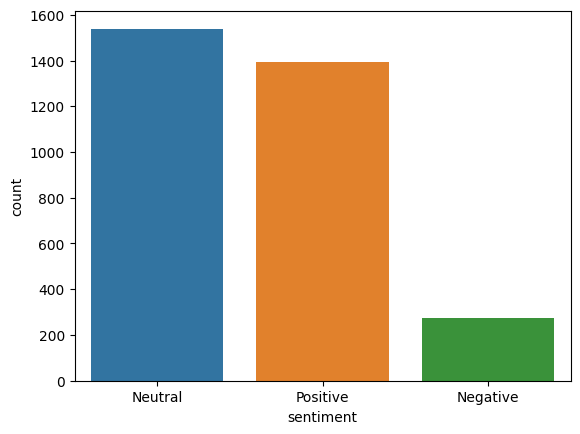

In [44]:
import seaborn as sns
sns.countplot(x = df['sentiment'])

In [45]:
df['sentiment'].value_counts()

sentiment
Neutral     1539
Positive    1394
Negative     274
Name: count, dtype: int64

<Axes: >

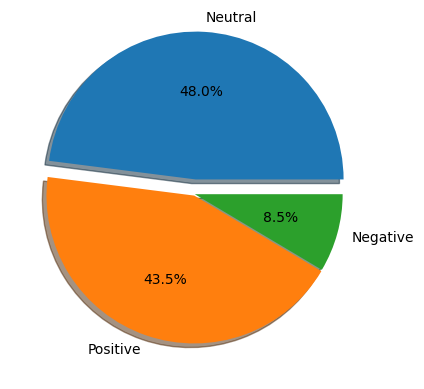

In [47]:
explode = (0.1, 0.01,0)
senti = df['sentiment'].value_counts()

senti.plot(kind='pie', autopct='%1.1f%%', shadow=True,
         explode=explode, label='')

In [48]:
positive = df[df.sentiment == 'Positive']
positive = positive.sort_values(['polarity'], ascending=False)

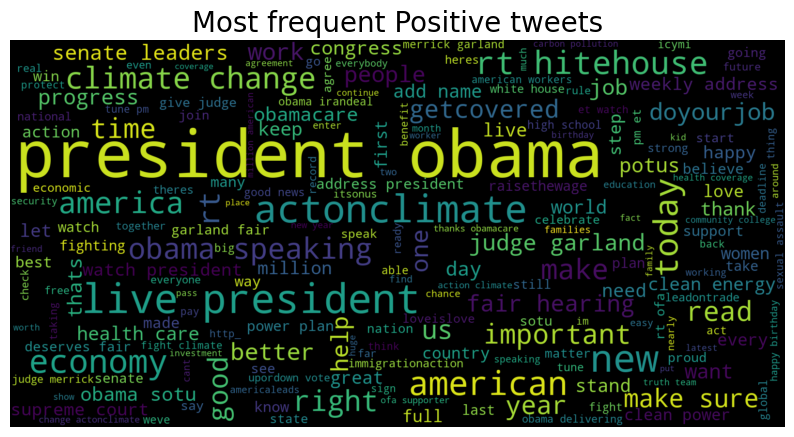

In [49]:
txt = ' '.join([word for word in positive['text']])
plt.figure(figsize=(10,8), facecolor='None')
wordcloud = WordCloud(max_words=200, width=1600, height=800).generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent Positive tweets', fontsize=20)
plt.show()

In [104]:
Negative = df[df.sentiment == 'Negative']
Negative = positive.sort_values(['polarity'], ascending=False)

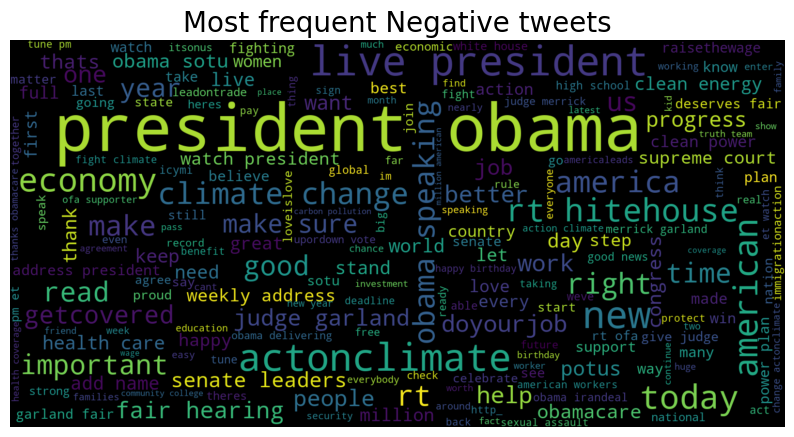

In [113]:
txt = ' '.join([word for word in Negative['text']])
plt.figure(figsize=(10,8), facecolor='None')
wordcloud = WordCloud(max_words=200, width=1600, height=800).generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent Negative tweets', fontsize=20)
plt.show()

In [110]:
Neutral = df[df['sentiment'] == 'Neutral']
Neutral = Neutral.sort_values(['polarity'], ascending=False)

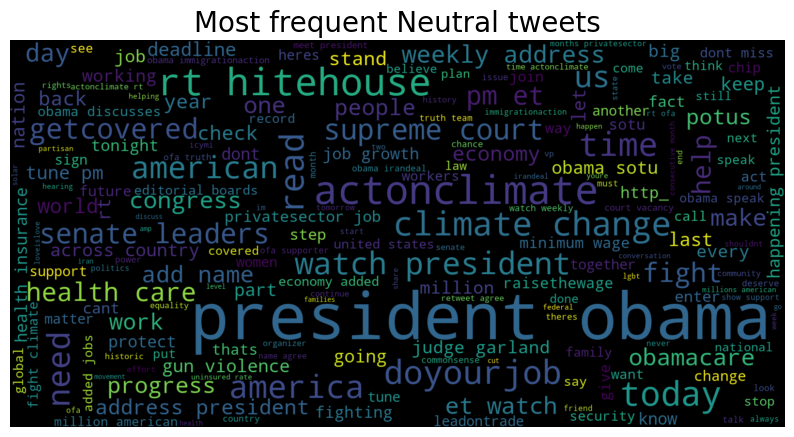

In [112]:
txt = ' '.join([word for word in Neutral['text']])
plt.figure(figsize=(10,8), facecolor='None')
wordcloud = WordCloud(max_words=200, width=1600, height=800).generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent Neutral tweets', fontsize=20)
plt.show()